In [1]:
import pandas as pd
df = pd.read_csv('https://url.kr/b1k2c8')

# **1.EDA**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43307 entries, 0 to 43306
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pos     43307 non-null  int64  
 1   flw     43307 non-null  int64  
 2   flg     43307 non-null  int64  
 3   bl      43307 non-null  int64  
 4   pic     43307 non-null  int64  
 5   lin     43307 non-null  int64  
 6   cl      43307 non-null  int64  
 7   cz      43307 non-null  float64
 8   ni      43307 non-null  float64
 9   erl     43307 non-null  float64
 10  erc     43307 non-null  float64
 11  lt      43307 non-null  float64
 12  hc      43307 non-null  float64
 13  pr      43307 non-null  float64
 14  fo      43307 non-null  float64
 15  cs      43307 non-null  float64
 16  pi      43307 non-null  float64
 17  class   43307 non-null  object 
dtypes: float64(10), int64(7), object(1)
memory usage: 5.9+ MB


In [3]:
#알아보기 쉽게 column rename
df = df.rename(columns={'pos':'post', 'flw':'follower', 'flg':'following', 'bl':'biography_lengh',
                        'pic':'picture', 'lin':'link', 'cl':'caption_length', 'cz':'caption_zero',
                        'ni':'non_image_percentage', 'erl':'like_rate', 'erc':'comment_rate', 'lt':'location_tag',
                        'hc':'hashtag', 'pr':'promotional_keywords', 'fo':'followers_keywords',
                        'cs':'cosine_similarity', 'pi':'post_interval', 'class':'class'})

- post | 게시물 개수
- following | 팔로잉 수
- follower | 팔로워 수
- biography_length | 유저의 소개글 길이(철자의 수)
- picture | 프로필 사진이 없으면 0, 있으면 1
- link | 외부 url이 없으면 0, 있으면 1
- caption_length | 게시글의 평균 글자수
- caption_zero | 게시글의 글자수가 3보다 같거나 적은 게시물의 비율
- non_image_percentage | 사진이 아닌 게시글의 비율. 
- like_rate | 좋아요 참여율 (총 좋아요 개수 / 게시물 개수 / 팔로워 수)
- comment_rate | 댓글 참여율 (총 댓글 개수 / 게시물 개수 / 팔로워 수)
- location_tag | 위치 태그를 한 게시물의 비율
- hashtag | 한 게시물 당 평균 해시태그 개수
- promotional_keywords | 게시물당 광고성 해시태그 개수의 평균
- followers_keywords | 게시물당 팔로워를 모으기 위한 해시태그 개수의 평균
- cosine_similarity | 게시물 간의 코사인 유사도
- post_interval | 게시물 간 평균 간격
- class | a:활발하게 활동하는 가짜 계정,	i:비활성화된 가짜 계정,	r:진짜 계정,	s:스팸 계정

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
post,43307,NaN,NaN,NaN,152.552,701.72,0,4,22,102,76200
follower,43307,NaN,NaN,NaN,827.477,12503.9,0,107,289,712.5,1.9e+06
following,43307,NaN,NaN,NaN,2817.93,2806.1,0,483,1400,6100,7800
biography_lengh,43307,NaN,NaN,NaN,46.2633,60.6034,0,0,13,85,555
picture,43307,NaN,NaN,NaN,0.932644,0.250641,0,1,1,1,1
link,43307,NaN,NaN,NaN,0.142448,0.349513,0,0,0,0,1
caption_length,43307,NaN,NaN,NaN,120.868,212.129,-1,2,30,133,3274
caption_zero,43307,NaN,NaN,NaN,0.291397,0.356736,0,0,0.111111,0.529412,1
non_image_percentage,43307,NaN,NaN,NaN,0.184412,0.258915,0,0,0.056,0.278,1
like_rate,43307,NaN,NaN,NaN,20.4049,146.742,0,1.95,7.85,17.99,26650


In [5]:
#결측치 확인
df.isnull().sum()

post                    0
follower                0
following               0
biography_lengh         0
picture                 0
link                    0
caption_length          0
caption_zero            0
non_image_percentage    0
like_rate               0
comment_rate            0
location_tag            0
hashtag                 0
promotional_keywords    0
followers_keywords      0
cosine_similarity       0
post_interval           0
class                   0
dtype: int64

In [6]:
#결측치 없음

In [7]:
#중복값 확인
df.duplicated().sum()

1082

In [8]:
df[df.duplicated(keep = False)]

,post,follower,following,biography_lengh,picture,link,caption_length,caption_zero,non_image_percentage,like_rate,comment_rate,location_tag,hashtag,promotional_keywords,followers_keywords,cosine_similarity,post_interval,class
12965,0,30,149,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,i
14025,0,0,0,0,0,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,i
14559,0,0,0,0,0,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,i
14606,0,30,149,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,i
16155,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43186,0,0,0,0,0,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,i
43188,0,34,7500,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,i
43189,0,77,7400,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,i
43190,0,70,7300,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,i


In [9]:
df = df.drop_duplicates()

In [10]:
#중복값 제거 완료. 칼럼별로 이상치 확인 후 삭제

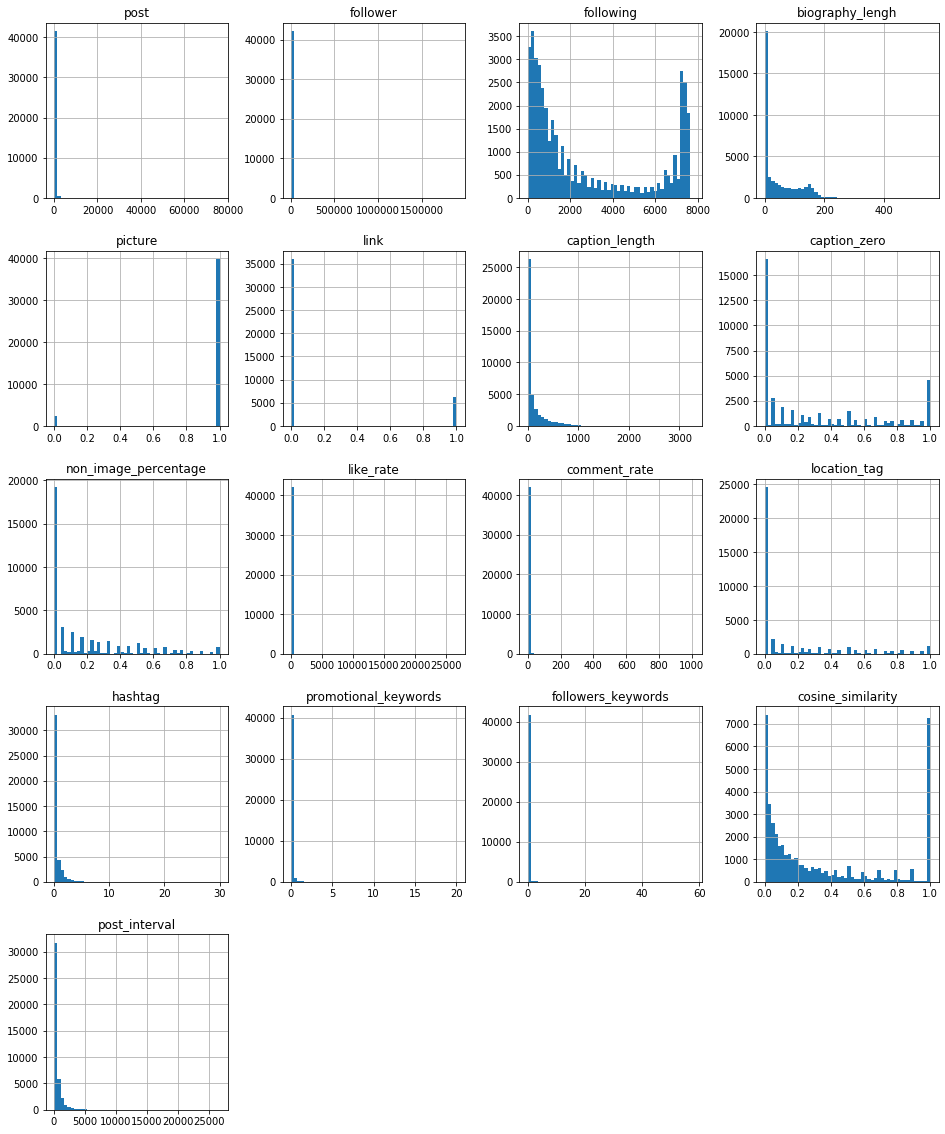

In [11]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(16,20))
plt.show()



1.   post




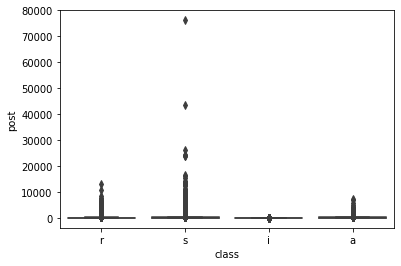

In [12]:
import seaborn as sns

sns.boxplot(x="class", y="post", data=df)

In [13]:
df.drop(df[df['post']>20000].index, inplace=True)



2.   follower




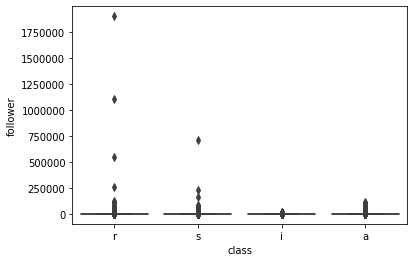

In [14]:
sns.boxplot(x="class", y="follower", data=df)

In [15]:
df.drop(df[df['follower']>50000].index, inplace=True)



3.   following



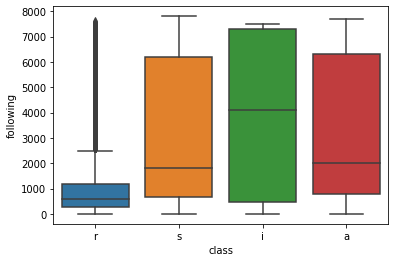

In [16]:
sns.boxplot(x="class", y="following", data=df)



4.   biography_lengh 




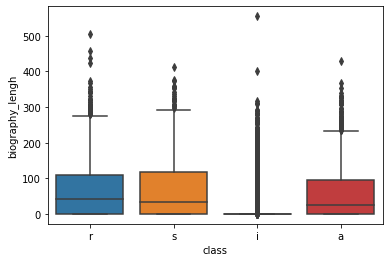

In [17]:
sns.boxplot(x="class", y="biography_lengh", data=df)

In [18]:
df.drop(df[df['biography_lengh']>500].index, inplace=True)



5.   caption_length 


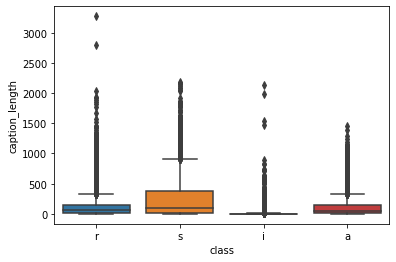

In [19]:
sns.boxplot(x="class", y="caption_length", data=df)

In [20]:
df.drop(df[df['caption_length'] > 2500].index, inplace=True)



6.   caption_zero



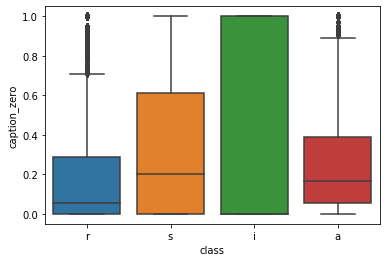

In [21]:
sns.boxplot(x="class", y="caption_zero", data=df)



7.   location_tag




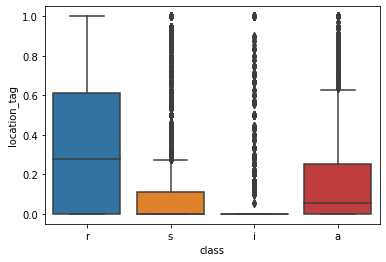

In [22]:
sns.boxplot(x="class", y="location_tag", data=df)



8.   non_image_percentage



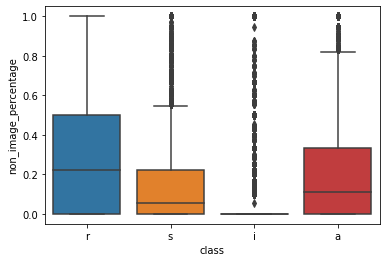

In [23]:
sns.boxplot(x="class", y="non_image_percentage", data=df)



9.   like_rate 




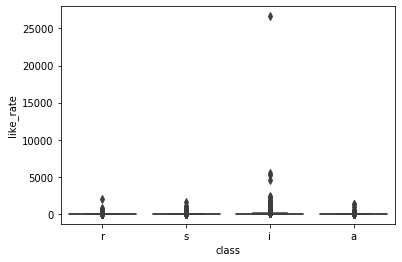

In [24]:
sns.boxplot(x="class", y="like_rate", data=df)

In [25]:
df.drop(df[df['like_rate']>3000].index, inplace=True)
df.drop(df[(df['like_rate']>1500) & (df['class'].isin(['r']))].index, inplace=True)
df.drop(df[(df['like_rate']>1200) & (df['class'].isin(['s']))].index, inplace=True)
df.drop(df[(df['like_rate']>1000) & (df['class'].isin(['a']))].index, inplace=True)



9.   comment_rate




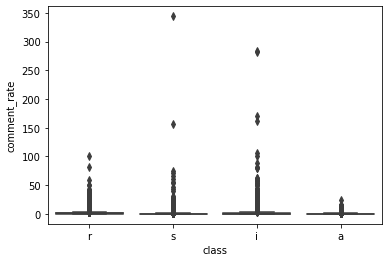

In [26]:
sns.boxplot(x="class", y="comment_rate", data=df)

In [27]:
df.drop(df[df['comment_rate']>150].index, inplace=True)
df.drop(df[(df['comment_rate']>40) & (df['class'].isin(['r']))].index, inplace=True)
df.drop(df[(df['comment_rate']>50) & (df['class'].isin(['i']))].index, inplace=True)



10.   hashtag





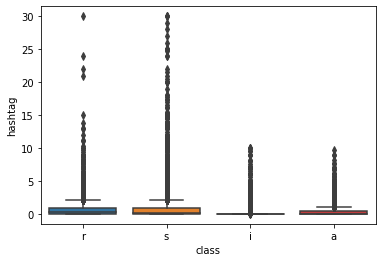

In [28]:
sns.boxplot(x="class", y="hashtag", data=df)



11.   promotional_keywords



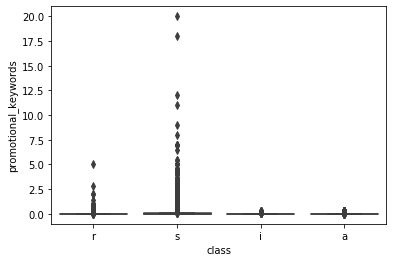

In [29]:
sns.boxplot(x="class", y="promotional_keywords", data=df)

In [30]:
df.drop(df[df['promotional_keywords']>10].index, inplace=True)
df.drop(df[(df['promotional_keywords']>4) & (df['class'].isin(['r']))].index, inplace=True)



12.   followers_keywords



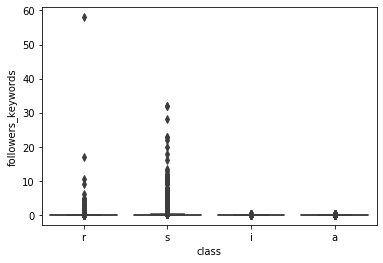

In [31]:
sns.boxplot(x="class", y="followers_keywords", data=df)

In [32]:
df.drop(df[(df['followers_keywords']>15) & (df['class'].isin(['s']))].index, inplace=True)



13.   cosine_similarity 




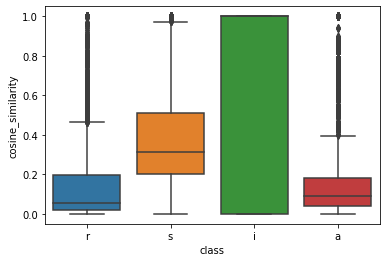

In [33]:
sns.boxplot(x="class", y="cosine_similarity", data=df)



14.   post_interval




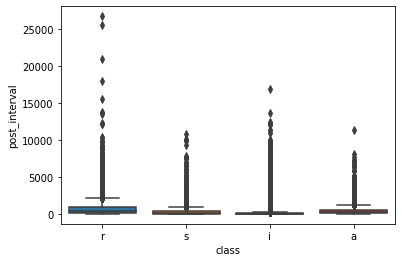

In [34]:
sns.boxplot(x="class", y="post_interval", data=df)

In [35]:
df.drop(df[(df['post_interval']>20000) & (df['class'].isin(['r']))].index, inplace=True)

In [36]:
df.groupby('class').agg(['mean', 'max']).T

class                                 a  ...             s
post                 mean    185.308344  ...    272.561107
                     max    7200.000000  ...  16500.000000
follower             mean    777.860440  ...    831.302894
                     max   41000.000000  ...  45600.000000
following            mean   3142.225405  ...   3050.551036
                     max    7700.000000  ...   7800.000000
biography_lengh      mean     51.085098  ...     59.325381
                     max     428.000000  ...    412.000000
picture              mean      0.989871  ...      0.982792
                     max       1.000000  ...      1.000000
link                 mean      0.149108  ...      0.167970
                     max       1.000000  ...      1.000000
caption_length       mean    117.555832  ...    236.090731
                     max    1452.000000  ...   2188.000000
caption_zero         mean      0.298361  ...      0.319653
                     max       1.000000  ...      1.000000
non_image_percentage mean      0.223946  ...      0.167063
                     max       1.000000  ...      1.000000
like_rate            mean      9.644585  ...     14.060085
                     max     887.650024  ...   1020.000000
comment_rate         mean      0.443882  ...      0.661025
                     max      23.959999  ...     71.430000
location_tag         mean      0.170642  ...      0.113831
                     max       1.000000  ...      1.000000
hashtag              mean      0.348631  ...      0.754539
                     max       9.750000  ...     30.000000
promotional_keywords mean      0.014308  ...      0.155287
                     max       0.286000  ...      9.000000
followers_keywords   mean      0.008572  ...      0.197602
                     max       0.182000  ...     13.500000
cosine_similarity    mean      0.222926  ...      0.376904
                     max       1.000000  ...      1.000000
post_interval        mean    399.214536  ...    328.985217
                     max   11304.919920  ...  10875.159180

[34 rows x 4 columns]

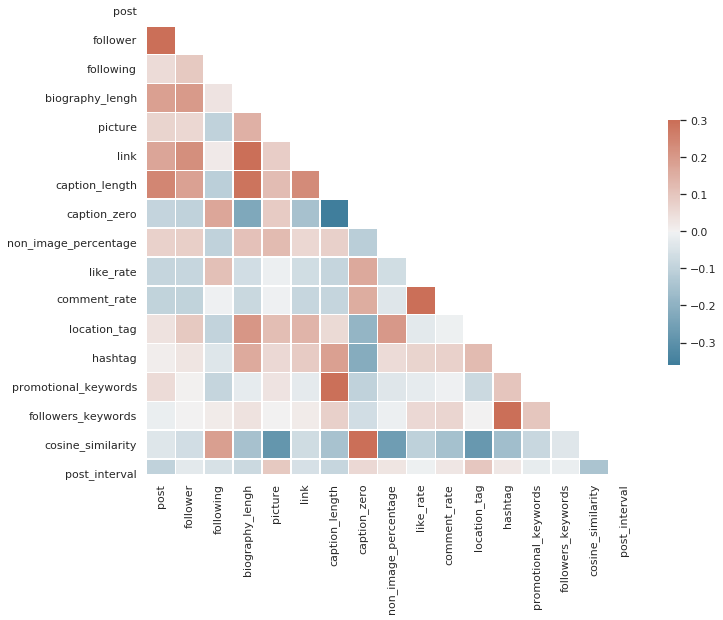

In [37]:
# 컬럼간 상관계수 확인
import numpy as np

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# **2.Feature Engineering**

In [38]:
#새로운 feature 생성
df['following>follower'] = 0
idx = df[df['follower'] < df['following']].index
df['following>follower'].loc[idx] = 1

df['like/post'] = df['like_rate'] * df['follower']
df['comment/post'] = df['comment_rate'] * df['follower']


#target value 를 숫자로 변경
df['class'] = df['class'].map({'a':2, 'i':1, 'r':0, 's':3})

#encoding을 위해 특성의 타입을 변경
df['picture'] = df['picture'].astype(str)
df['link'] = df['link'].astype(str)


df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,post,follower,following,biography_lengh,picture,link,caption_length,caption_zero,non_image_percentage,like_rate,comment_rate,location_tag,hashtag,promotional_keywords,followers_keywords,cosine_similarity,post_interval,class,following>follower,like/post,comment/post
0,69,541,440,293,1,0,223,0.000000,0.111,10.120000,0.50,0.944,0.556,0.0,0.0,0.107055,334.596802,0,0,5474.920000,270.500000
1,9,783,803,76,1,0,101,0.000000,0.000,19.820000,1.99,0.889,0.222,0.0,0.0,0.007400,2137.979248,0,1,15519.060000,1558.170000
2,390,1200,925,103,1,0,723,0.000000,0.000,11.540000,0.76,1.000,2.389,0.0,0.0,0.221954,96.244957,0,0,13848.000000,912.000000
3,138,1100,1000,40,1,0,24,0.166667,0.167,20.440001,1.61,0.833,0.111,0.0,0.0,0.025055,226.622437,0,0,22484.001100,1771.000000
4,1,228,487,84,1,0,30,0.000000,0.000,9.210000,1.75,1.000,0.000,0.0,0.0,0.000000,0.000000,0,1,2099.880000,399.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43302,34,421,705,0,1,0,0,1.000000,0.333,13.130000,0.01,0.000,0.000,0.0,0.0,1.000000,293.514740,2,1,5527.730046,4.210000
43303,3,26,124,0,1,0,0,1.000000,0.000,20.510000,1.28,0.667,0.000,0.0,0.0,1.000000,3049.940186,1,1,533.260006,33.279999
43304,10,323,1500,0,1,0,0,1.000000,0.100,4.020000,0.15,0.000,0.000,0.0,0.0,1.000000,89.871666,1,1,1298.459994,48.450002
43305,3,317,1000,0,1,0,12,0.333333,0.333,13.880000,0.63,0.333,0.000,0.0,0.0,0.000000,9.767870,1,1,4399.960035,199.709998


In [39]:
#column들의 순서 변경
df = df[['post',	'follower',	'following', 'following>follower', 'comment_rate', 'comment/post', 'like_rate', 'like/post',	
         'picture', 'link', 'biography_lengh',	'caption_length',	'caption_zero',	'non_image_percentage',	'location_tag',	'hashtag',
         'promotional_keywords',	'followers_keywords',	'cosine_similarity',	'post_interval',	'class']]
df

,post,follower,following,following>follower,comment_rate,comment/post,like_rate,like/post,picture,link,biography_lengh,caption_length,caption_zero,non_image_percentage,location_tag,hashtag,promotional_keywords,followers_keywords,cosine_similarity,post_interval,class
0,69,541,440,0,0.50,270.500000,10.120000,5474.920000,1,0,293,223,0.000000,0.111,0.944,0.556,0.0,0.0,0.107055,334.596802,0
1,9,783,803,1,1.99,1558.170000,19.820000,15519.060000,1,0,76,101,0.000000,0.000,0.889,0.222,0.0,0.0,0.007400,2137.979248,0
2,390,1200,925,0,0.76,912.000000,11.540000,13848.000000,1,0,103,723,0.000000,0.000,1.000,2.389,0.0,0.0,0.221954,96.244957,0
3,138,1100,1000,0,1.61,1771.000000,20.440001,22484.001100,1,0,40,24,0.166667,0.167,0.833,0.111,0.0,0.0,0.025055,226.622437,0
4,1,228,487,1,1.75,399.000000,9.210000,2099.880000,1,0,84,30,0.000000,0.000,1.000,0.000,0.0,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43302,34,421,705,1,0.01,4.210000,13.130000,5527.730046,1,0,0,0,1.000000,0.333,0.000,0.000,0.0,0.0,1.000000,293.514740,2
43303,3,26,124,1,1.28,33.279999,20.510000,533.260006,1,0,0,0,1.000000,0.000,0.667,0.000,0.0,0.0,1.000000,3049.940186,1
43304,10,323,1500,1,0.15,48.450002,4.020000,1298.459994,1,0,0,0,1.000000,0.100,0.000,0.000,0.0,0.0,1.000000,89.871666,1
43305,3,317,1000,1,0.63,199.709998,13.880000,4399.960035,1,0,0,12,0.333333,0.333,0.333,0.000,0.0,0.0,0.000000,9.767870,1


# **3.Modeling**

In [40]:
'''import sys
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install imbalanced-learn
    !pip install -U scikit-learn
    !pip install eli5
    !pip install pdpbox
    !pip install shap'''

"import sys\nif 'google.colab' in sys.modules:\n    !pip install category_encoders==2.*\n    !pip install imbalanced-learn\n    !pip install -U scikit-learn\n    !pip install eli5\n    !pip install pdpbox\n    !pip install shap"

In [41]:
#데이터를 훈련, 검증, 테스트셋으로 나눔 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.80, test_size=0.20, random_state=7)
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=7)

train.shape, val.shape, test.shape

((26963, 21), (6741, 21), (8426, 21))

In [42]:
#타겟 분리
target = 'class'

X_train = train.drop(target, axis=1)
X_val = val.drop(target, axis=1)
X_test = test.drop(target, axis=1)

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((26963, 20), (6741, 20), (8426, 20), (26963,), (6741,), (8426,))

In [43]:
#타겟 데이터 확인 -> 거의 valanced
y_train.value_counts(normalize=True)

2    0.286207
0    0.245188
3    0.244706
1    0.223899
Name: class, dtype: float64

In [44]:
#baseline model
major = y_train.mode()[0]
y_pred = [major] * len(y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.2862070244409005

In [45]:
#간단한 모델로 성능확인
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier

pipe = make_pipeline(
    TargetEncoder(),
    RandomForestClassifier(random_state=2)
)


pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Pipeline(steps=[('targetencoder', TargetEncoder(cols=['picture', 'link'])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2))])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matrix, n = 6741')

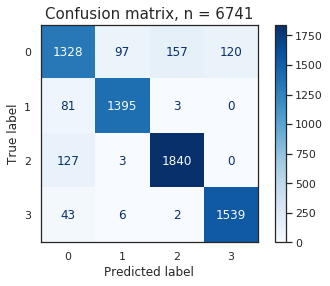

In [46]:
#정밀도, 재현율, f1 score, 정확도 확인
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [49]:
from sklearn.metrics import classification_report
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1702
           1       0.93      0.94      0.94      1479
           2       0.92      0.93      0.93      1970
           3       0.93      0.97      0.95      1590

    accuracy                           0.91      6741
   macro avg       0.90      0.91      0.90      6741
weighted avg       0.90      0.91      0.90      6741



In [50]:
#RandomizedSearchCV로 최적의 하이퍼파라미터 찾기
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe_tg = make_pipeline(
    TargetEncoder(),
    RandomForestClassifier(random_state=2)
)


dists = {   
    'targetencoder__min_samples_leaf': randint(1, 10), 
    'targetencoder__smoothing': [1.,10.], 
    'randomforestclassifier__n_estimators': randint(100, 500), 
    'randomforestclassifier__max_depth': randint(0, 20), 
    'randomforestclassifier__max_features': uniform(0, 1),
    'randomforestclassifier__min_samples_leaf': randint(1, 10)
}

clf_tg = RandomizedSearchCV(
    pipe_tg,
    param_distributions=dists,
    n_iter=3, 
    cv=3,
    scoring='accuracy', #타겟이 비교적 valanced 이므로 정확도를 평가지표로 선택
    verbose=1,
    n_jobs=-1
)

clf_tg.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('targetencoder', TargetEncoder()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=2))]),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f41418c7150>,
                                        'randomforestclassifier__max_features': <scipy.stats._d...
                                        'randomforestclassifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4127a34e10>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f41412ab1d0>,
                                        'targetencoder__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f411

In [51]:
pd.DataFrame(clf_tg.cv_results_).sort_values(by='rank_test_score').T

,1,2,0
mean_fit_time,17.8146,12.9341,57.7896
std_fit_time,0.0653261,1.43441,0.310812
mean_score_time,0.37277,0.450683,0.78355
std_score_time,0.000853417,0.045861,0.0128461
param_randomforestclassifier__max_depth,15,19,10
param_randomforestclassifier__max_features,0.490002,0.264181,0.760026
param_randomforestclassifier__min_samples_leaf,6,7,6
param_randomforestclassifier__n_estimators,198,240,495
param_targetencoder__min_samples_leaf,9,2,2
param_targetencoder__smoothing,10,10,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matrix, n = 6741')

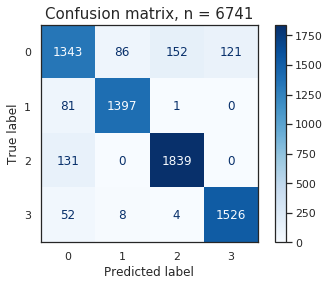

In [52]:
#점수가 가장 높은 모델을 가져옴
pipe_tg = clf_tg.best_estimator_

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_tg, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [53]:
y_pred = pipe_tg.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1702
           1       0.94      0.94      0.94      1479
           2       0.92      0.93      0.93      1970
           3       0.93      0.96      0.94      1590

    accuracy                           0.91      6741
   macro avg       0.91      0.91      0.91      6741
weighted avg       0.90      0.91      0.90      6741



In [54]:
#leakage는 없는 것 같다. 
#그렇지만 f1 score의 향상이 없다.
#특성중요도를 확인해보고 성능에 영향을 미치지 않을 것 같은 특성을 제거해보자

In [55]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #경고끄기

from sklearn.pipeline import Pipeline
pipe = Pipeline([('preprocessing', make_pipeline(TargetEncoder(min_samples_leaf=4, smoothing=1))),
                 ('rf', RandomForestClassifier(max_depth=13, max_features=0.698727, min_samples_leaf=2, n_estimators=143))])

pipe.fit(X_train, y_train)

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe.named_steps['rf'],
    scoring='accuracy',
    n_iter=5,
    random_state=2
)

X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

permuter.fit(X_val_transformed, y_val)

eli5.show_weights(permuter, feature_names=X_val.columns.tolist())

Weight,Feature
0.2229 ± 0.0118,post
0.1963 ± 0.0052,caption_length
0.1912 ± 0.0085,cosine_similarity
0.0853 ± 0.0061,comment_rate
0.0852 ± 0.0056,following
0.0701 ± 0.0028,like_rate
0.0693 ± 0.0074,post_interval
0.0382 ± 0.0025,promotional_keywords
0.0296 ± 0.0019,followers_keywords
0.0198 ± 0.0045,like/post


In [69]:
#Weight값이 음수인 특성 삭제
target = 'class'

X_train = train.drop(target, axis=1)
X_val = val.drop(target, axis=1)
X_test = test.drop(target, axis=1)

y_train = train[target]
y_val = val[target]
y_test = test[target]


def dlt(df):
  df = df.drop(columns=['picture'])

  return df


X_train=dlt(X_train)
X_val=dlt(X_val)
X_test=dlt(X_test)

In [70]:
# 본격적으로 부스팅모델에 적용해보자
## lgbmboost, target encoder, RandomizedSearchCV
from lightgbm import LGBMClassifier

pipe_lg = make_pipeline(
    TargetEncoder(),
    LGBMClassifier()
)


dists = {   
    'targetencoder__min_samples_leaf': randint(1, 10), 
    'targetencoder__smoothing': [1.,10.], 
    'lgbmclassifier__learning_rate': [0.1, 0.01],     
    'lgbmclassifier__num_leaves': randint(1, 50), 
    'lgbmclassifier__max_depth': randint(1, 20), 
    'lgbmclassifier__n_estimators': randint(100, 500)
}

clf_lg = RandomizedSearchCV(
    pipe_lg,
    param_distributions=dists,
    n_iter=5, 
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

clf_lg.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('targetencoder', TargetEncoder()),
                                             ('lgbmclassifier',
                                              LGBMClassifier())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'lgbmclassifier__learning_rate': [0.1,
                                                                          0.01],
                                        'lgbmclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f40a7281690>,
                                        'lgbmclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4092093cd0>,
                                        'lgbmclassifier__num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4092093090>,
                                        'targetencoder__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f40

In [71]:
pd.DataFrame(clf_lg.cv_results_).sort_values(by='rank_test_score').T

,0,4,1,2,3
mean_fit_time,17.4777,10.3221,7.36276,6.49356,3.49561
std_fit_time,0.0909262,1.46084,0.14917,0.0374198,0.00740109
mean_score_time,2.04381,1.27314,0.835379,0.424324,0.245599
std_score_time,0.109725,0.138886,0.0301352,0.0151203,0.0109629
param_lgbmclassifier__learning_rate,0.1,0.1,0.1,0.01,0.01
param_lgbmclassifier__max_depth,19,5,7,6,2
param_lgbmclassifier__n_estimators,483,443,321,155,273
param_lgbmclassifier__num_leaves,32,34,14,46,6
param_targetencoder__min_samples_leaf,9,8,9,8,2
param_targetencoder__smoothing,10,1,1,10,10


In [82]:
encoder = TargetEncoder(min_samples_leaf=2, smoothing=1)
X_train_encoded = encoder.fit_transform(X_train, y_train) # 학습데이터
X_val_encoded = encoder.transform(X_val, y_val) # 검증데이터

boosting = LGBMClassifier(
    n_estimators=483,
    max_depth=19,
    num_leaves=32,
    learning_rate=0.1,
    n_jobs=-1
)


eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

boosting.fit(X_train_encoded, y_train,   
          eval_set=eval_set,
          early_stopping_rounds=50
         )

[1]	training's multi_logloss: 1.23081	valid_1's multi_logloss: 1.23116
Training until validation scores don't improve for 50 rounds.
[2]	training's multi_logloss: 1.10732	valid_1's multi_logloss: 1.10896
[3]	training's multi_logloss: 1.00387	valid_1's multi_logloss: 1.00661
[4]	training's multi_logloss: 0.915673	valid_1's multi_logloss: 0.919231
[5]	training's multi_logloss: 0.839012	valid_1's multi_logloss: 0.843184
[6]	training's multi_logloss: 0.772146	valid_1's multi_logloss: 0.777253
[7]	training's multi_logloss: 0.713477	valid_1's multi_logloss: 0.719344
[8]	training's multi_logloss: 0.661377	valid_1's multi_logloss: 0.667698
[9]	training's multi_logloss: 0.615005	valid_1's multi_logloss: 0.62206
[10]	training's multi_logloss: 0.573596	valid_1's multi_logloss: 0.58123
[11]	training's multi_logloss: 0.536767	valid_1's multi_logloss: 0.545058
[12]	training's multi_logloss: 0.503281	valid_1's multi_logloss: 0.512355
[13]	training's multi_logloss: 0.473516	valid_1's multi_logloss: 0.

LGBMClassifier(max_depth=19, n_estimators=483, num_leaves=32)

Text(0.5, 1.0, 'Confusion matrix, n = 6741')

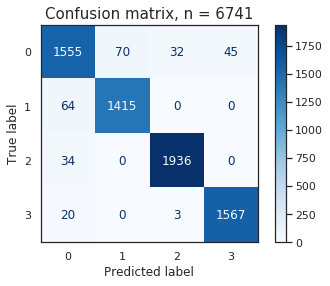

In [83]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(boosting, X_val_encoded, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [84]:
y_pred = boosting.predict(X_val_encoded)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1702
           1       0.95      0.96      0.95      1479
           2       0.98      0.98      0.98      1970
           3       0.97      0.99      0.98      1590

    accuracy                           0.96      6741
   macro avg       0.96      0.96      0.96      6741
weighted avg       0.96      0.96      0.96      6741



In [85]:
X_test_encoded = encoder.transform(X_test, y_test)

y_pred_t = boosting.predict(X_test_encoded)
print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2100
           1       0.96      0.95      0.96      1928
           2       0.98      0.98      0.98      2358
           3       0.96      0.99      0.97      2040

    accuracy                           0.96      8426
   macro avg       0.95      0.95      0.95      8426
weighted avg       0.96      0.96      0.96      8426



# **4.Interpreting ML Model**

In [ ]:
# 최종모델로 shop value를 사용해서 어떤 feature가 타겟에 얼만큼 영향을 주는지 알아보자

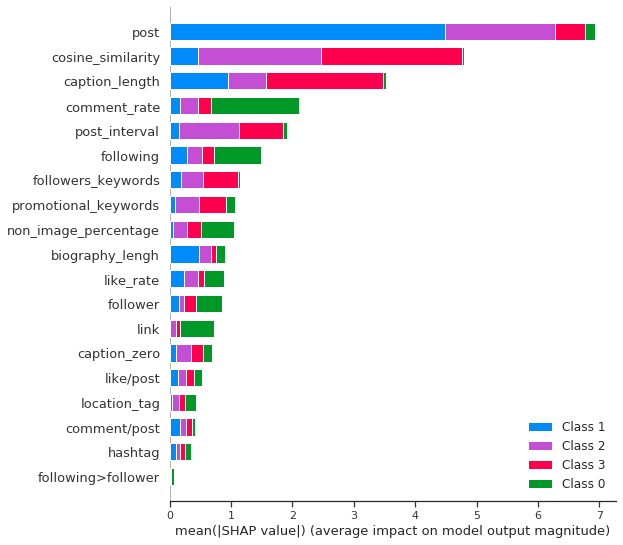

In [98]:
import shap
encoder = TargetEncoder(min_samples_leaf=6, smoothing=1)
X_train_encoded = encoder.fit_transform(X_train, y_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터
X_test_encoded = encoder.transform(X_test) # 테스트데이터


explainer = shap.TreeExplainer(boosting)
shap_values = explainer.shap_values(X_test_encoded.iloc[:300])

shap.initjs()
shap.summary_plot(shap_values, X_train_encoded.iloc[:300])

- 타겟 값에 따라 영향력이 다른데, 진짜 계정을 나타내는 초록색 바를 보면 코멘트레이트가 가장 영향력이 크고, 그 다음으로 팔로잉 수의 영향력이 큼

- 파란색으로 나타낸 비활성 가짜계정이 게시물 수의 영향을 크게 받아, 게시물수의 총 영향력이 전체 특성중에서 가장 큰 것으로 나타남

In [ ]:
# 총 영향력이 가장 컸던 게시물 수에 대한 타겟값의 변화를 클래스 별로 확인

(<Figure size 1080x1080 with 9 Axes>,
 {'pdp_ax': [{'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f40913a8310>,
    '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f40913ec290>},
   {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f409129c390>,
    '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f40913bfd90>},
   {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f40911a6510>,
    '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f40912c0a10>},
   {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f40910abd10>,
    '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f40911c0fd0>}],
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f40922026d0>})

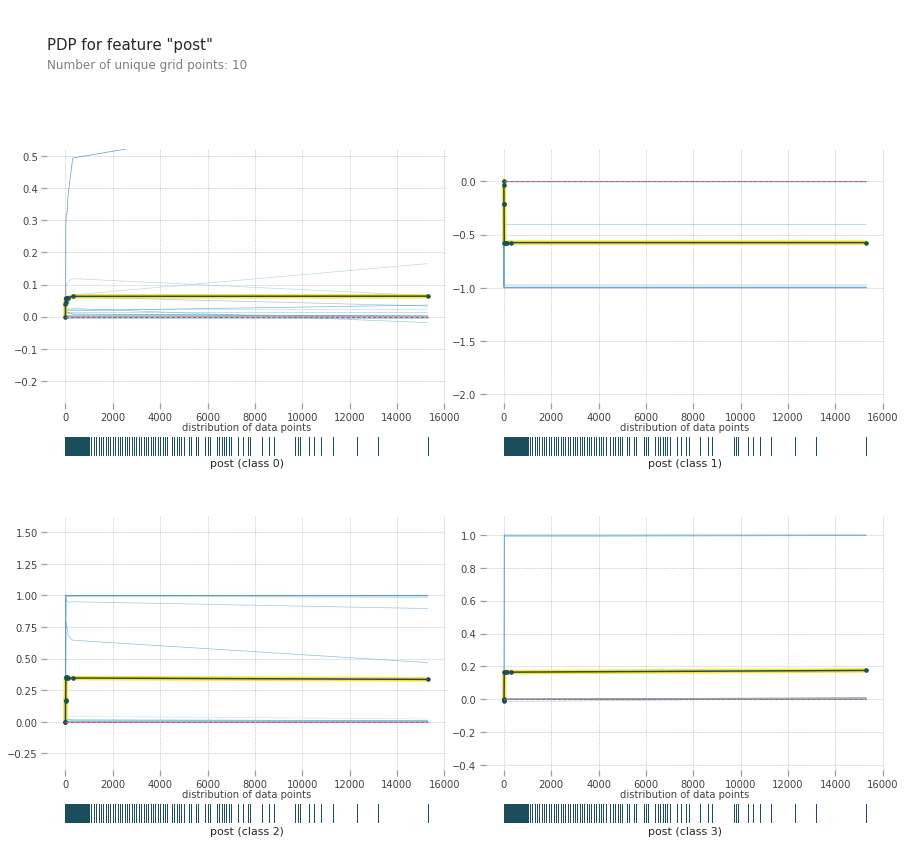

In [87]:
isolated = pdp_isolate(
    model=boosting, 
    dataset=X_train_encoded, 
    model_features=X_train_encoded.columns, 
    feature='post',
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)

pdp_plot(isolated
         , feature_name='post'
         , plot_lines=True # ICE plots
         , frac_to_plot=0.001 # or 10 (# 10000 val set * 0.001)
         , plot_pts_dist=True) 

- 직전에 가장 영향을 많이 받았던 비활성 가짜계정만 다른 양상을 보임
- 게시물 수가 일정 개수 이상 늘어나면 급격하게 값이 음수로 떨어진다 ->  게시물 수가 얼마 이상 이면 비활성 가짜 계정이 아닐 확률이 급격히 증가

In [ ]:
# 팔로잉과 팔로워과의 관계

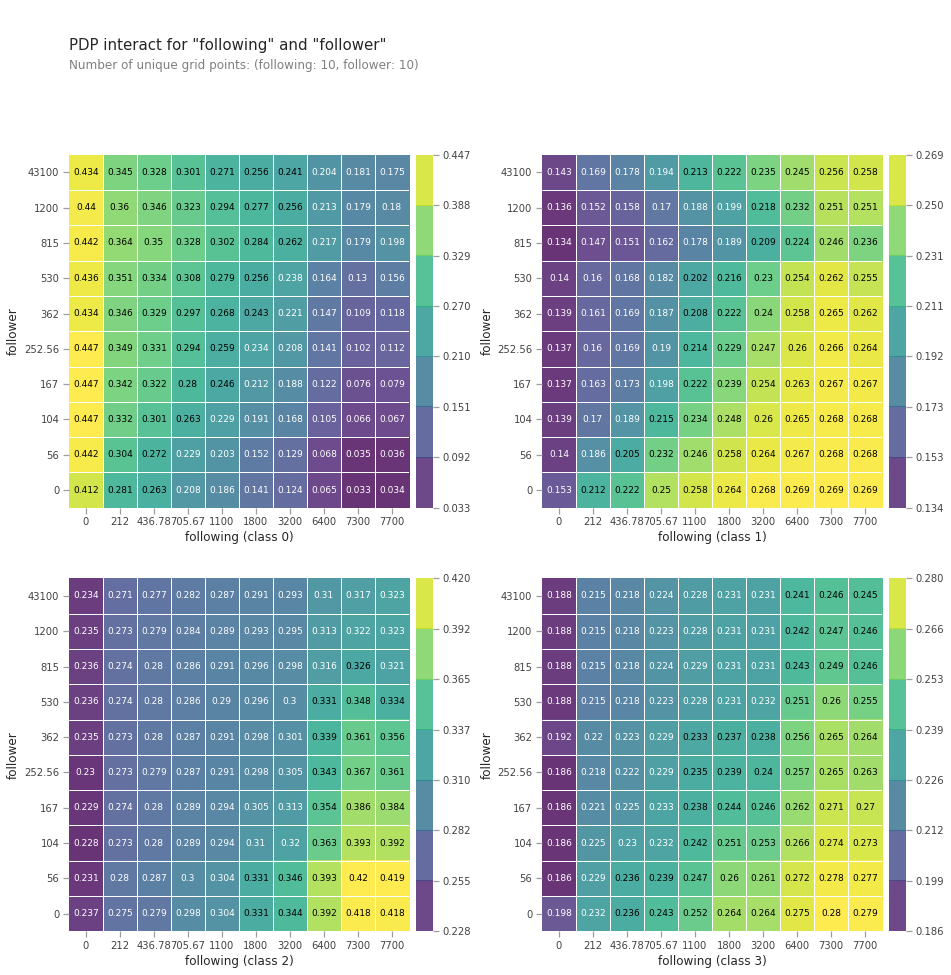

In [89]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['following', 'follower']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_val_encoded,
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

- 네 개의 PDP 중에서 진짜 계정을 제외하고는 비슷한 분포를 보임
- 진짜 계정은 팔로잉이 낮으면 팔로워의 수에 크게 관계 없이 두 특성에 영향을 받는다
- 나머지 계정들은 팔로잉이 높고 팔로워의 수가 낮으면 타겟변수에 영향을 미친다

In [ ]:
# 진짜 계정에 큰 영향을 미쳤던 코멘트레이트와 비슷한 척도인 라이크레이트의 상관관계를 확인

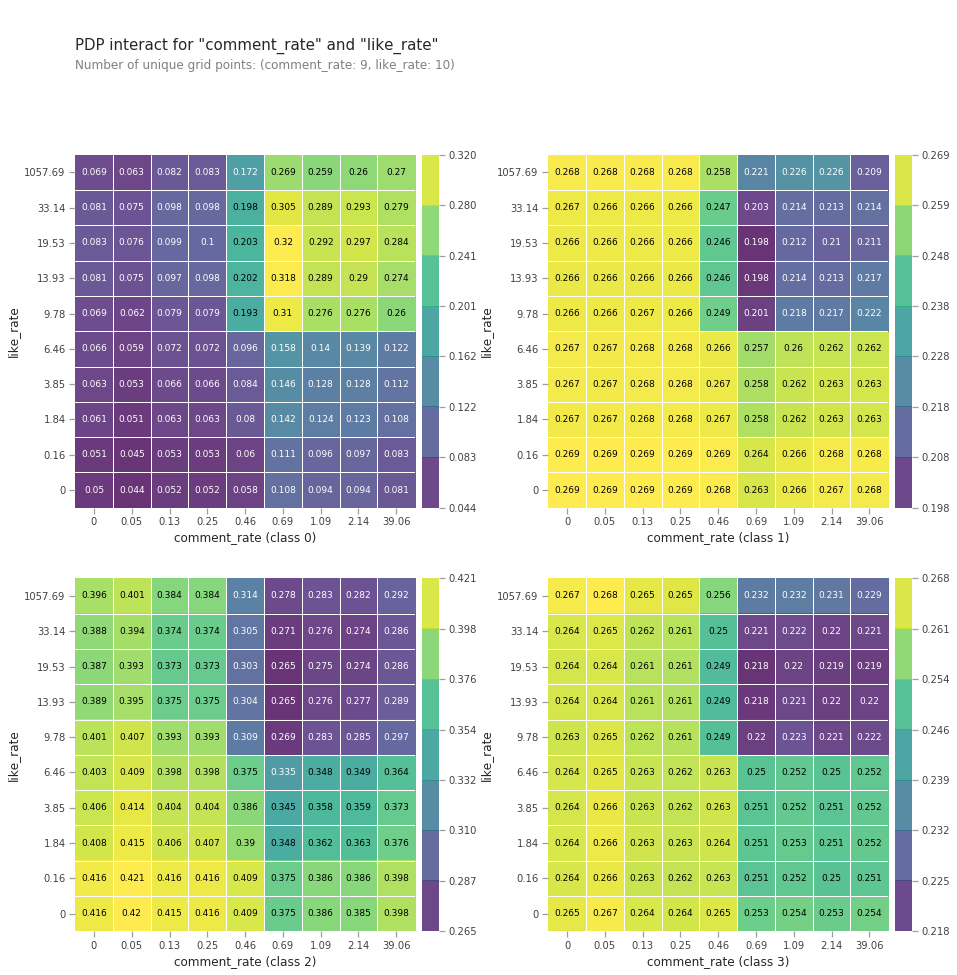

In [96]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['comment_rate', 'like_rate']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_val_encoded,
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

- 진짜 계정의 경우 코멘트 레이트가 0.69보다 작으면 라이크 레이크의 값과는 관계없이 타겟 변수에 영향을 주지 않는다
- 진짜 계정의 경우 코멘트 레이트가 0.69보다 크고 라이크 레이크의 값이 일정 수준 이상이면 타겟 변수에 영향을 준다
- 가짜 계정들은 코멘트 레이트의 값이 작을수록 두 특성에 영향을 많이 받는다